# Перед тем как мы начнем

В двух словах про Python

In [1]:
print("Hello world")

Hello world


In [3]:
# Комментарий
# Назначеие переменных

my_var = 7

In [5]:
if my_var > 6:
    print("This is more than 6!")
else:
    print("Not yet")

This is more than 6!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [6]:
def my_function(x):
    if x > 7:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [7]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [8]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [9]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [10]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [11]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [12]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. Пустых значений в данной таблице не оказалось.


In [17]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Высокую корреляцию имеют коэффициенты TotalWorkingYears и JobLevel, также высокую корреляцию имеют показатели PercentSalaryHike и Performance Rating.

In [72]:
# Проверим, сколько у нас уникальных значений в столбце
df_hr['BusinessTravel'].nunique()

3

In [73]:
#Определим значения:
df_hr['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

## Вопрос вопросов: 

А почему мы храним именно 0 и 1? 

In [ ]:
"""


Просуммировать данные мы не можем, поскольку тип данных относится к object. 
Мы можем посчитать количество с помощью функции COUNT


"""

In [76]:
df_hr['BusinessTravel'].count()

1470

In [79]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


##  Сейчас будет чуть сложнее

In [80]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   


Тут мы имеем: 
* int64

* object

Далее займемся занимательным рисованием

In [81]:
%matplotlib inline

In [83]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

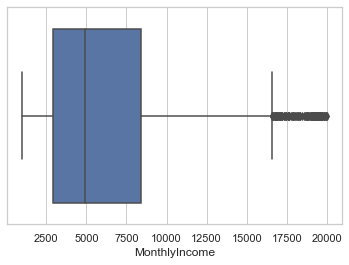

In [84]:
# Нарисуем боксплот для ежемесячного дохода
sns.boxplot(x=df_hr["MonthlyIncome"])

In [ ]:
# Видим, что распределение явно смещенное, все выбросы справа 
# Построим гистограмму плотностей распределения, чтобы увидеть чуть больше деталей

Text(0, 0.5, 'Amount of employees')

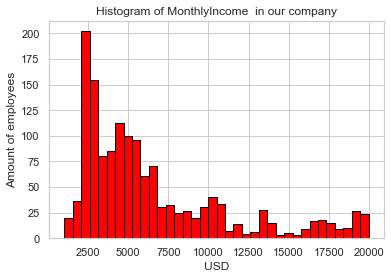

In [87]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of MonthlyIncome  in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [89]:
import numpy as np

In [90]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [93]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [92]:
# Обращает внимание что медиана ниже среднего значения где-то на 1583. 

In [94]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [95]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [96]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [113]:
# Выделим в отдельные массивы сотрудников с разными BusinessTravel
df_hr_g1 = df_hr[df_hr['BusinessTravel'] == 'Travel_Rarely']
df_hr_g0 = df_hr[df_hr['BusinessTravel'] == 'Travel_Frequently']
df_hr_g2 = df_hr[df_hr['BusinessTravel'] == 'Non-Travel']

# И сразу проверим что сработало корректно
df_hr_g1.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
10,35,No,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,1,Male,84,4,1,Laboratory Technician,2,Married,2426,16479,0,Y,No,13,3,3,80,1,6,5,3,5,4,0,3
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,2,Male,93,3,1,Laboratory Technician,4,Divorced,2661,8758,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2


In [114]:
df_hr_g0.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
39,33,No,Travel_Frequently,1141,Sales,1,3,Life Sciences,1,52,3,Female,42,4,2,Sales Executive,1,Married,5376,3193,2,Y,No,19,3,1,80,2,10,3,3,5,3,1,3
43,27,No,Travel_Frequently,994,Sales,8,3,Life Sciences,1,56,4,Male,37,3,3,Sales Executive,3,Single,8726,2975,1,Y,No,15,3,4,80,0,9,0,3,9,8,1,7
44,30,No,Travel_Frequently,721,Research & Development,1,2,Medical,1,57,3,Female,58,3,2,Laboratory Technician,4,Single,4011,10781,1,Y,No,23,4,4,80,0,12,2,3,12,8,3,7
48,46,No,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,Y,Yes,21,4,3,80,0,14,4,3,9,6,0,8
55,33,No,Travel_Frequently,515,Research & Development,1,2,Life Sciences,1,73,1,Female,98,3,3,Research Director,4,Single,13458,15146,1,Y,Yes,12,3,3,80,0,15,1,3,15,14,8,12


In [115]:
print("Count of BusinessTravel Status 'Travel_Rarely' is {} and for 'Non-Travel' is {} and for 'Travel_Frequently' is {} ".format(len(df_hr_g1),
                                                                                                                                 len(df_hr_g0),len(df_hr_g2)))

Count of BusinessTravel Status 'Travel_Rarely' is 1043 and for 'Non-Travel' is 277 and for 'Travel_Frequently' is 150 


In [117]:
#Выделим отдельные массивы для сотрудником с разным "OverTime"
df_hr_g3 = df_hr[df_hr['OverTime'] == 'Yes']
df_hr_g4 = df_hr[df_hr['OverTime'] == 'No']

In [120]:
print("Median of Monthly Income for OverTime Status 'Yes' is {} and for 'No' is {} ".format(np.median(df_hr_g3.MonthlyIncome),
                                           np.median(df_hr_g4.MonthlyIncome)))

Median of Monthly Income for OverTime Status 'Yes' is 5061.5 and for 'No' is 4880.0 


Text(0.5, 1.0, 'BoxPlot of MonthlyIncome for Yes is {} ')

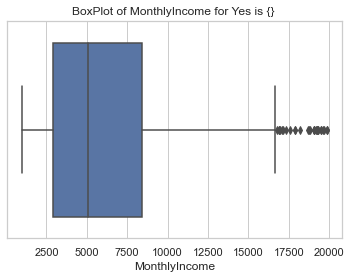

In [144]:
sns.boxplot(x=df_hr_g3["MonthlyIncome"])
plt.title('BoxPlot of MonthlyIncome for Yes is {} ')

Text(0.5, 1.0, 'BoxPlot of MonthlyIncome for No is {} ')

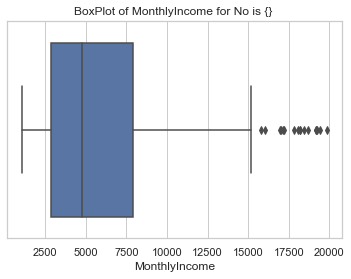

In [145]:
sns.boxplot(x=df_hr_g0["MonthlyIncome"])
plt.title('BoxPlot of MonthlyIncome for No is {} ')

Text(0, 0.5, 'Amount of employees')

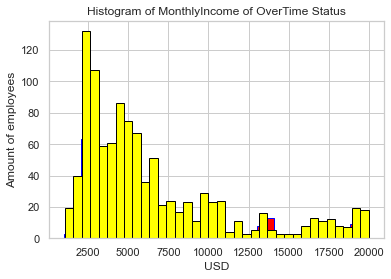

In [150]:
plt.hist(df_hr_g3['MonthlyIncome'], color = 'red', edgecolor = 'blue',
         bins = int(180/5))

plt.hist(df_hr_g4['MonthlyIncome'], color = 'yellow', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of MonthlyIncome of OverTime Status')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [152]:
# Видим, что хотя количество объектов и отличаются высота столбиков сотрудников с переработками и без.
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [159]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_inc'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [161]:
df_anomally_inc = df_hr[df_hr['anomally_inc'] == 1]

df_anomally_inc

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal,anomally_inc


In [164]:
print("Count of Anomally Monthly Income is {} ".format(len(df_anomally_inc)))

Count of Anomally Monthly Income is 0 


In [163]:
"""

Аномальных значений нет.


"""

'\n\nАномальных значений нет.\n\n\n'

## Оценка DailyRate

In [165]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal,anomally_inc
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.0
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.0,0.0
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.0,0.0
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.0,0.0
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.0,0.0
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.0,0.0
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,0.0,0.0


(array([80., 67., 67., 73., 67., 70., 93., 76., 87., 53., 75., 72., 81.,
        46., 87., 75., 74., 84., 73., 70.]),
 array([ 102.  ,  171.85,  241.7 ,  311.55,  381.4 ,  451.25,  521.1 ,
         590.95,  660.8 ,  730.65,  800.5 ,  870.35,  940.2 , 1010.05,
        1079.9 , 1149.75, 1219.6 , 1289.45, 1359.3 , 1429.15, 1499.  ]),
 <BarContainer object of 20 artists>)

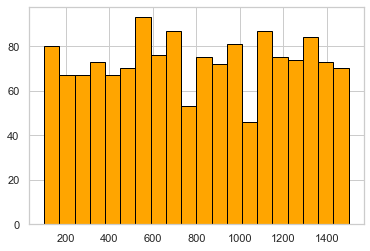

In [167]:
plt.hist(df_hr['DailyRate'], color = 'orange', edgecolor = 'black', bins = 20)

Каких-то заментых возмущений не наблюдается, распределение плюс-минус случайное. 

Из метода .describe() выше нам известно, что 75-перцентиль находится на уровне 1157. 

Давайте также посчитаем где лежит 90-й перцентиль. 



In [169]:
df_hr.DailyRate.quantile(q=0.9)

1356.0

Это означает, что дневная ставка 90% сотрудников составляет 1356 USD.

Давайте объявим аномалиями все что выше этой отметки и выведем тех у кого доход 1356 USD и более. 

In [170]:
df_hr_ab = df_hr[df_hr['DailyRate'] > 1356]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal,anomally_inc
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,0,0
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8,0,0
31,44,No,Travel_Rarely,1459,Research & Development,10,4,Other,1,40,4,Male,41,3,2,Healthcare Representative,4,Married,6465,19121,2,Y,Yes,13,3,4,80,0,9,5,4,4,2,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,38,No,Travel_Frequently,1444,Human Resources,1,4,Other,1,1972,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2,0,0
1422,35,No,Travel_Rarely,1490,Research & Development,11,4,Medical,1,2003,4,Male,43,3,1,Laboratory Technician,3,Married,2660,20232,7,Y,Yes,11,3,3,80,1,5,3,3,2,2,2,2,0,0
1424,35,No,Travel_Rarely,1395,Research & Development,9,4,Medical,1,2008,2,Male,48,3,2,Research Scientist,3,Single,5098,18698,1,Y,No,19,3,2,80,0,10,5,3,10,7,0,8,0,0
1433,25,No,Travel_Rarely,1382,Sales,8,2,Other,1,2018,1,Female,85,3,2,Sales Executive,3,Divorced,4907,13684,0,Y,Yes,22,4,2,80,1,6,3,2,5,3,0,4,0,0


Получили 146 человек. У всех у них дневная ставка выше, либо равна 1356 USD. 

# Выводы по набору данных


1. Набор содержит информацию о 1470 сотрудниках, из которых 1043 сотрудника совершают редкие деловые поездки, 270 сотрудников невыездные, а 150 сотрудников часто уезжают в командировку. Исторические данные смешаны с фактическими данными о сотрудниках
2. Зарплаты между сотрудниками со сверхурочными и сотрудниками без переработок распределены скорее всего равномерно, явных искажений не наблюдается
3. 146 человек имеют сверхвысокую дневную ставку более 1356 USD, это больше чем у 90% персонала.
4. Явных аномальных значений по ежемесячной оплате труда не наблюдается. Что очень странно(